## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [3]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB 1.1 MB/s eta 0:01:33
   ---------------------------------------- 0.1/101.0 MB 777.7 kB/s eta 0:02:10
   ---------------------------------------- 0.1/101.0 MB 726.2 kB/s eta 0:02:19
   ---------------------------------------- 0.1/101.0 MB 726.2 kB/s eta 0:02:19
   ---------------------------------------- 0.1/101.0 MB 532.5 kB/s eta 0:03:10
   ---------------------------------------- 0.2/101.0 MB 482.7 kB/s eta 0:03:29
   ---------------------------------

In [5]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.2/99.7 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.3/99.7 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 0.5/99.7 MB 2.3 MB/s eta 0:00:43
   ---------------------------------------- 0.5/99.7 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.6/99.7 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.6/99.7 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 0.7/99.7 MB 1.9 MB/s eta 0:00:53
   ----------------------------

In [34]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

#### Import the CSV Data as Pandas DataFrame

In [35]:
df = pd.read_csv('Data_train_clean.csv')

#### Show Top 5 Records

In [36]:
df.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25
2,2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25
4,4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45


In [37]:
df.shape

(10681, 16)

In [38]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Source', 'Destination', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_hour', 'Duration_min'],
      dtype='object')

In [39]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45


In [41]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Dep_hour           0
Dep_min            0
Duration_hour      0
Duration_min       0
dtype: int64

#### Preparing X and Y variables

In [42]:
X = df.drop(columns=['Price'],axis=1)

In [43]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0,8,24,3,2019,1,10,22,20,2,50
1,1,3,0,2,8,1,5,2019,13,15,5,50,7,25
2,4,2,1,2,8,9,6,2019,4,25,9,25,19,0
3,3,3,0,1,8,12,5,2019,23,30,18,5,5,25
4,3,0,5,1,8,1,3,2019,21,35,16,50,4,45


In [44]:
y = df['Price']

In [45]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10676     4107.0
10677     4145.0
10678     7229.0
10679    12648.0
10680    11753.0
Name: Price, Length: 10681, dtype: float64

In [46]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8544, 14), (2137, 14))

#### Create an Evaluate Function to give all metrics after model Training

In [47]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list =[]
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3424.8745
- Mean Absolute Error: 2426.8175
- R2 Score: 0.4387
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3607.8610
- Mean Absolute Error: 2488.0558
- R2 Score: 0.4263


Lasso
Model performance for Training set
- Root Mean Squared Error: 3424.8756
- Mean Absolute Error: 2426.6614
- R2 Score: 0.4387
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3608.0139
- Mean Absolute Error: 2487.9292
- R2 Score: 0.4262


Ridge
Model performance for Training set
- Root Mean Squared Error: 3424.8746
- Mean Absolute Error: 2426.8030
- R2 Score: 0.4387
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3607.9097
- Mean Absolute Error: 2488.0516
- R2 Score: 0.4263


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2183.1021
- Mean Absolute Error: 1288.3330


In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoost Regressor,0.899928
6,XGBRegressor,0.883466
5,Random Forest Regressor,0.838026
4,Decision Tree,0.773691
3,K-Neighbors Regressor,0.618132
0,Linear Regression,0.426269
2,Ridge,0.426253
1,Lasso,0.426220
8,AdaBoost Regressor,0.356090


### Results

## Catboost Regression

In [62]:
catboost_model= CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=2)
catboost_model =catboost_model.fit(X_train, y_train)

0:	learn: 3461.7832297	total: 2.01ms	remaining: 2.01s
1:	learn: 3241.7078901	total: 4.17ms	remaining: 2.08s
2:	learn: 3087.1818361	total: 7.38ms	remaining: 2.45s
3:	learn: 2876.5649982	total: 9.44ms	remaining: 2.35s
4:	learn: 2731.1085748	total: 11.8ms	remaining: 2.35s
5:	learn: 2504.8060343	total: 15.2ms	remaining: 2.52s
6:	learn: 2467.4667360	total: 17.7ms	remaining: 2.51s
7:	learn: 2434.8995814	total: 22.3ms	remaining: 2.77s
8:	learn: 2390.4296850	total: 24.8ms	remaining: 2.73s
9:	learn: 2358.3152503	total: 27.1ms	remaining: 2.69s
10:	learn: 2338.5732235	total: 30ms	remaining: 2.7s
11:	learn: 2298.2826687	total: 32.6ms	remaining: 2.68s
12:	learn: 2251.8657794	total: 35.5ms	remaining: 2.69s
13:	learn: 2216.2764404	total: 38.4ms	remaining: 2.7s
14:	learn: 2202.4347899	total: 41.3ms	remaining: 2.71s
15:	learn: 2191.2688701	total: 44.5ms	remaining: 2.74s
16:	learn: 2180.9408907	total: 46.9ms	remaining: 2.71s
17:	learn: 2163.8149607	total: 49.5ms	remaining: 2.7s
18:	learn: 2146.9148748	t

198:	learn: 1661.6552489	total: 576ms	remaining: 2.32s
199:	learn: 1660.8150796	total: 579ms	remaining: 2.32s
200:	learn: 1659.7818221	total: 582ms	remaining: 2.31s
201:	learn: 1658.4776631	total: 584ms	remaining: 2.31s
202:	learn: 1656.2906241	total: 586ms	remaining: 2.3s
203:	learn: 1655.0604535	total: 588ms	remaining: 2.29s
204:	learn: 1654.5631196	total: 589ms	remaining: 2.29s
205:	learn: 1653.6216685	total: 591ms	remaining: 2.28s
206:	learn: 1652.4140739	total: 593ms	remaining: 2.27s
207:	learn: 1651.9514848	total: 596ms	remaining: 2.27s
208:	learn: 1651.8590946	total: 597ms	remaining: 2.26s
209:	learn: 1650.5453433	total: 599ms	remaining: 2.25s
210:	learn: 1649.2030259	total: 602ms	remaining: 2.25s
211:	learn: 1648.2582807	total: 605ms	remaining: 2.25s
212:	learn: 1647.4306896	total: 607ms	remaining: 2.24s
213:	learn: 1646.5275859	total: 610ms	remaining: 2.24s
214:	learn: 1645.8813124	total: 613ms	remaining: 2.24s
215:	learn: 1644.7119212	total: 616ms	remaining: 2.24s
216:	learn:

377:	learn: 1548.8362649	total: 1.14s	remaining: 1.88s
378:	learn: 1548.2907662	total: 1.15s	remaining: 1.88s
379:	learn: 1547.9301084	total: 1.15s	remaining: 1.88s
380:	learn: 1547.5530455	total: 1.15s	remaining: 1.88s
381:	learn: 1547.0050071	total: 1.16s	remaining: 1.87s
382:	learn: 1546.5231960	total: 1.16s	remaining: 1.87s
383:	learn: 1545.9861498	total: 1.16s	remaining: 1.86s
384:	learn: 1545.5240385	total: 1.16s	remaining: 1.86s
385:	learn: 1545.0753173	total: 1.17s	remaining: 1.85s
386:	learn: 1544.6031098	total: 1.17s	remaining: 1.85s
387:	learn: 1544.2576066	total: 1.17s	remaining: 1.85s
388:	learn: 1543.8117321	total: 1.17s	remaining: 1.84s
389:	learn: 1543.1533961	total: 1.18s	remaining: 1.84s
390:	learn: 1542.8302823	total: 1.18s	remaining: 1.84s
391:	learn: 1542.6296585	total: 1.18s	remaining: 1.84s
392:	learn: 1542.1890908	total: 1.19s	remaining: 1.83s
393:	learn: 1541.7509085	total: 1.19s	remaining: 1.83s
394:	learn: 1541.4522797	total: 1.19s	remaining: 1.83s
395:	learn

565:	learn: 1476.7211929	total: 1.72s	remaining: 1.32s
566:	learn: 1476.4472164	total: 1.72s	remaining: 1.32s
567:	learn: 1476.1320166	total: 1.73s	remaining: 1.31s
568:	learn: 1476.0795310	total: 1.73s	remaining: 1.31s
569:	learn: 1475.7304210	total: 1.73s	remaining: 1.31s
570:	learn: 1475.1400413	total: 1.74s	remaining: 1.3s
571:	learn: 1474.4869634	total: 1.74s	remaining: 1.3s
572:	learn: 1474.2086643	total: 1.75s	remaining: 1.3s
573:	learn: 1474.1861579	total: 1.75s	remaining: 1.3s
574:	learn: 1474.0916699	total: 1.75s	remaining: 1.3s
575:	learn: 1473.5895843	total: 1.76s	remaining: 1.29s
576:	learn: 1473.1058669	total: 1.76s	remaining: 1.29s
577:	learn: 1472.7237479	total: 1.76s	remaining: 1.29s
578:	learn: 1472.3824282	total: 1.77s	remaining: 1.29s
579:	learn: 1472.3474131	total: 1.77s	remaining: 1.28s
580:	learn: 1471.9724298	total: 1.77s	remaining: 1.28s
581:	learn: 1471.9003712	total: 1.78s	remaining: 1.28s
582:	learn: 1471.6574318	total: 1.78s	remaining: 1.27s
583:	learn: 147

749:	learn: 1428.8777600	total: 2.29s	remaining: 764ms
750:	learn: 1428.8518219	total: 2.29s	remaining: 761ms
751:	learn: 1428.6489643	total: 2.3s	remaining: 757ms
752:	learn: 1428.4597701	total: 2.3s	remaining: 754ms
753:	learn: 1428.4032607	total: 2.3s	remaining: 752ms
754:	learn: 1428.0934276	total: 2.31s	remaining: 749ms
755:	learn: 1427.7956195	total: 2.31s	remaining: 745ms
756:	learn: 1427.4469977	total: 2.31s	remaining: 742ms
757:	learn: 1427.4283866	total: 2.31s	remaining: 739ms
758:	learn: 1427.3776998	total: 2.32s	remaining: 736ms
759:	learn: 1427.2065607	total: 2.32s	remaining: 733ms
760:	learn: 1426.9624189	total: 2.32s	remaining: 730ms
761:	learn: 1426.8188338	total: 2.33s	remaining: 727ms
762:	learn: 1426.5964797	total: 2.33s	remaining: 724ms
763:	learn: 1426.0267527	total: 2.33s	remaining: 721ms
764:	learn: 1425.9515065	total: 2.34s	remaining: 718ms
765:	learn: 1425.7490043	total: 2.34s	remaining: 715ms
766:	learn: 1425.5335116	total: 2.34s	remaining: 712ms
767:	learn: 1

920:	learn: 1396.9390854	total: 2.88s	remaining: 247ms
921:	learn: 1396.7165212	total: 2.88s	remaining: 244ms
922:	learn: 1396.5366171	total: 2.88s	remaining: 241ms
923:	learn: 1396.3079158	total: 2.88s	remaining: 237ms
924:	learn: 1396.0376051	total: 2.89s	remaining: 234ms
925:	learn: 1395.8490134	total: 2.89s	remaining: 231ms
926:	learn: 1395.7334254	total: 2.89s	remaining: 228ms
927:	learn: 1395.4809009	total: 2.89s	remaining: 225ms
928:	learn: 1395.2930062	total: 2.9s	remaining: 221ms
929:	learn: 1395.1913510	total: 2.9s	remaining: 218ms
930:	learn: 1395.0681609	total: 2.9s	remaining: 215ms
931:	learn: 1394.9326524	total: 2.9s	remaining: 212ms
932:	learn: 1394.6283588	total: 2.91s	remaining: 209ms
933:	learn: 1394.4968701	total: 2.91s	remaining: 206ms
934:	learn: 1394.2140123	total: 2.91s	remaining: 203ms
935:	learn: 1394.0690401	total: 2.92s	remaining: 199ms
936:	learn: 1393.8694142	total: 2.92s	remaining: 196ms
937:	learn: 1393.6901948	total: 2.92s	remaining: 193ms
938:	learn: 13

In [63]:

y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.31


## Plot y_pred and y_test

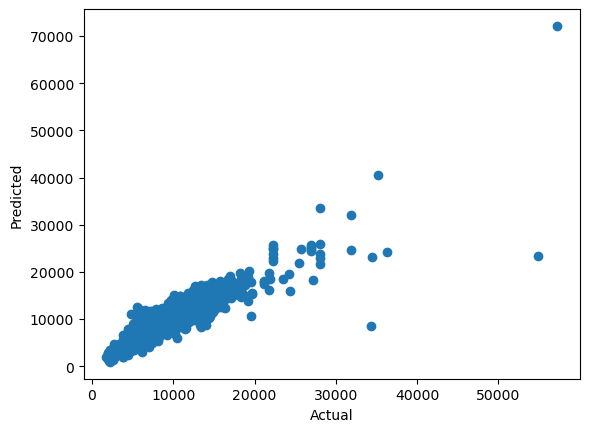

In [64]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

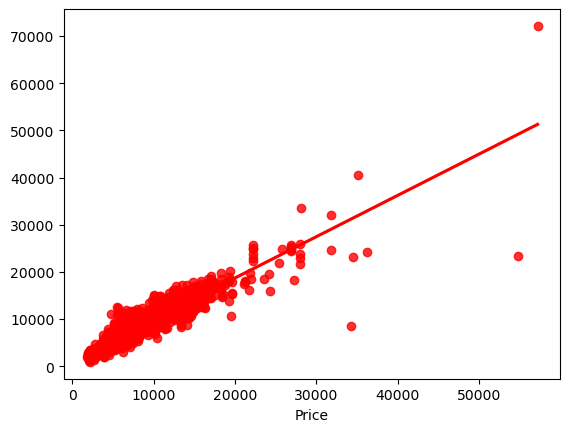

In [65]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [66]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
4830,10413.0,10970.396933,-557.396933
3771,4030.0,5339.476530,-1309.476530
1523,5963.0,7922.549880,-1959.549880
3393,6860.0,7424.582287,-564.582287
4169,14571.0,14309.622825,261.377175
...,...,...,...
9869,4622.0,6436.888311,-1814.888311
10061,7452.0,4996.583851,2455.416149
6911,6121.0,6135.634003,-14.634003
8616,13731.0,13002.398753,728.601247
